In [1]:
!pip install opendatasets
!pip install pandas
!pip uninstall tensorflow keras -y
!pip install tensorflow==2.14.0
!pip install keras==2.14.0

!pip install upgrade keras



Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Successfully uninstalled keras-2.15.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.1
    Uninstalling google-auth-oauthlib-1.2.1:
      Successfully uninstalled google-auth-oauthlib-1.2.1
  Attempting uninstall: tensorboa

In [2]:
# prompt: check tensroflow and keras version

import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.14.0
Keras version: 2.14.0


In [3]:
import opendatasets as od
import pandas
od.download("https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ithathriveni
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf


100%|██████████| 179M/179M [00:00<00:00, 228MB/s]


# Tomato Disease Detection Project

Welcome to my Tomato Disease Detection project! In this notebook, I'll walk you through the process and results of my project, where I developed a machine learning model to detect and classify diseases in tomato plants.

## Project Background

Tomato farming is essential for global food production, but it faces significant challenges due to various diseases that can affect tomato plants. Early detection and accurate classification of these diseases are crucial for crop management and ensuring food security.

## Dataset

I used a comprehensive dataset of tomato plant images, including examples of healthy plants and various disease states. This dataset serves as the foundation for training and evaluating my machine learning model.

## Project Goals

The primary objectives of this project are as follows:
- Build and train a machine learning model to accurately detect diseases in tomato plants.
- Classify the specific disease type if present.
- Evaluate the model's performance using appropriate metrics.

## Methodology

I will employ deep learning techniques, specifically convolutional neural networks (CNNs), for image classification. I'll also explore data preprocessing, model architecture, and fine-tuning to achieve the best possible results.

## Project Structure

This notebook is organized as follows:
1. Data Preparation: Exploring and preprocessing the dataset.
2. Model Development: Building and training the CNN model.
3. Model Evaluation: Assessing the model's performance and discussing the results.
4. Conclusion: Summarizing the findings and potential future work.

Let's get started with the project and dive into the fascinating world of tomato disease detection!


In [4]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


# Setting Paths for Training and Validation Data

In this project, we'll be working with a dataset of tomato leaf images to train and validate our machine learning model for tomato disease detection. To do this, we need to specify the paths to the folders containing our training and validation datasets.

The training data typically includes a large set of images used to train our model, while the validation data is used to assess the model's performance on unseen data.

Let's define the paths to our training and validation data folders:

- `train_path`: This path points to the directory containing our training data. These images will be used to train our model to recognize various tomato diseases.

- `valid_path`: This path leads to the folder with our validation data. The validation dataset is crucial for evaluating how well our trained model generalizes to new, unseen tomato leaf images.

Now that we've set the paths to our data, we can proceed to load and preprocess the images, build our model, and begin training it to detect tomato diseases.


In [5]:
# Set paths to train and validation folders
train_path = "/content/tomatoleaf/tomato/train"
valid_path = "/content/tomatoleaf/tomato/val"

# Data Preprocessing with ImageDataGenerator

To effectively train a deep learning model for tomato disease detection, it's crucial to prepare and preprocess the dataset appropriately. In this section, we'll discuss the data preprocessing steps using the `ImageDataGenerator` from Keras.

The following code sets up our data preprocessing pipeline:

- `image_size`: We define the desired image size for our dataset. In this case, we've set it to (224, 224) pixels, a common choice for many deep learning models.

- `batch_size`: This parameter determines the number of images processed in each training iteration. A batch size of 32 means that the model will update its weights after processing 32 images.

- `train_datagen`: Here, we configure an `ImageDataGenerator` for augmenting and preprocessing the training images. These transformations help enhance the model's ability to generalize from the limited training data. The specific operations include:
    - `rescale=1.0/255`: Scaling pixel values to the range [0, 1] to ensure consistent input to the model.
    - `rotation_range=20`: Randomly rotating images by up to 20 degrees to introduce variety.
    - `width_shift_range=0.2` and `height_shift_range=0.2`: Shifting the image horizontally and vertically by up to 20% of the image width or height, respectively.
    - `shear_range=0.2`: Applying shear transformations to the images.
    - `zoom_range=0.2`: Zooming in or out on images by up to 20%.
    - `horizontal_flip=True`: Flipping images horizontally, which increases data diversity.

These preprocessing steps, such as rotation, shifting, and flipping, will help our model become more robust and better at detecting tomato diseases in various conditions. With the data preprocessing pipeline in place, we're ready to load the dataset, create data generators, and start training our model.


In [6]:
# Define image data generators with data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size = (224, 224)
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [7]:
valid_datagen = ImageDataGenerator(rescale=1.0/255)

# Creating Data Generators for Training and Validation

Now that we've defined our data preprocessing pipeline using `ImageDataGenerator`, the next step is to create data generators for both our training and validation datasets. These data generators will efficiently load and augment the data, making it ready for training our tomato disease detection model.

Here's how we set up the data generators:

- `train_generator`: We create a data generator for our training dataset using the `flow_from_directory` method. This generator will load images from the `train_path`, which we defined earlier, and perform the following actions:
    - `directory`: Specifies the directory where the training images are located.
    - `target_size`: Sets the desired image size, which we previously defined as (224, 224) pixels.
    - `batch_size`: Determines the number of images processed in each training iteration, and we've set it to 32.
    - `class_mode`: We specify "categorical" as the class mode, indicating that our model will predict categories (disease classes) using one-hot encoding.

- `valid_generator`: Similarly, we create a data generator for our validation dataset using the same `flow_from_directory` method. This generator loads images from the `valid_path` and applies the same settings as the training generator.

These data generators are crucial for training and evaluating our model efficiently. They handle the loading of images, apply the data augmentation transformations defined earlier, and organize the data into batches. This setup allows us to feed the data seamlessly to our model during the training process.

With the data generators in place, we're one step closer to building and training our tomato disease detection model effectively.


In [8]:
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 10000 images belonging to 10 classes.


In [9]:
valid_generator = valid_datagen.flow_from_directory(
    directory=valid_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 1000 images belonging to 10 classes.


# Displaying Random Images from Dataset Subfolders

In the process of working with image datasets, it's essential to get a visual sense of the data. This code snippet provides a utility function, `display_random_images`, that allows us to display a random selection of images from subfolders within a specified directory. This can be particularly useful for exploring the diversity and content of our tomato disease dataset.


- `display_random_images(directory, num_images=9, num_columns=3)`: This is the main function. It takes three parameters:
    - `directory`: The directory where the dataset subfolders are located.
    - `num_images` (optional, default=9): The number of random images to display.
    - `num_columns` (optional, default=3): The number of columns in the display grid.

The function performs the following steps:
1. It identifies subfolders within the specified directory.
2. Randomly selects one of these subfolders.
3. Lists the image files within the chosen subfolder.
4. Randomly selects `num_images` from the available images.
5. Creates a grid for displaying the selected images, arranging them in rows and columns.
6. Displays the images with their filenames as titles.

This utility function can help you visually inspect your dataset, ensuring that it contains a diverse set of images representing different classes or categories. It's also a handy tool for data exploration and quality control.

To use this function in your notebook, simply call `display_random_images` with the appropriate directory containing your tomato disease images and the desired number of images to display.


In [10]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_random_images(directory, num_images=9, num_columns=3):
    subfolders = [subfolder for subfolder in os.listdir(directory) if os.path.isdir(os.path.join(directory, subfolder))]
    if len(subfolders) == 0:
        print(f"No subfolders found in {directory}")
        return

    random_subfolder = random.choice(subfolders)
    subfolder_path = os.path.join(directory, random_subfolder)
    image_files = [filename for filename in os.listdir(subfolder_path) if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if len(image_files) < num_images:
        print(f"Number of available images in {subfolder_path} is less than {num_images}")
        return

    random_files = random.sample(image_files, num_images)
    num_rows = (num_images + num_columns - 1) // num_columns
    plt.figure(figsize=(15, 10))

    for i, filename in enumerate(random_files):
        img_path = os.path.join(subfolder_path, filename)
        img = mpimg.imread(img_path)
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename)

    plt.tight_layout()
    plt.show()

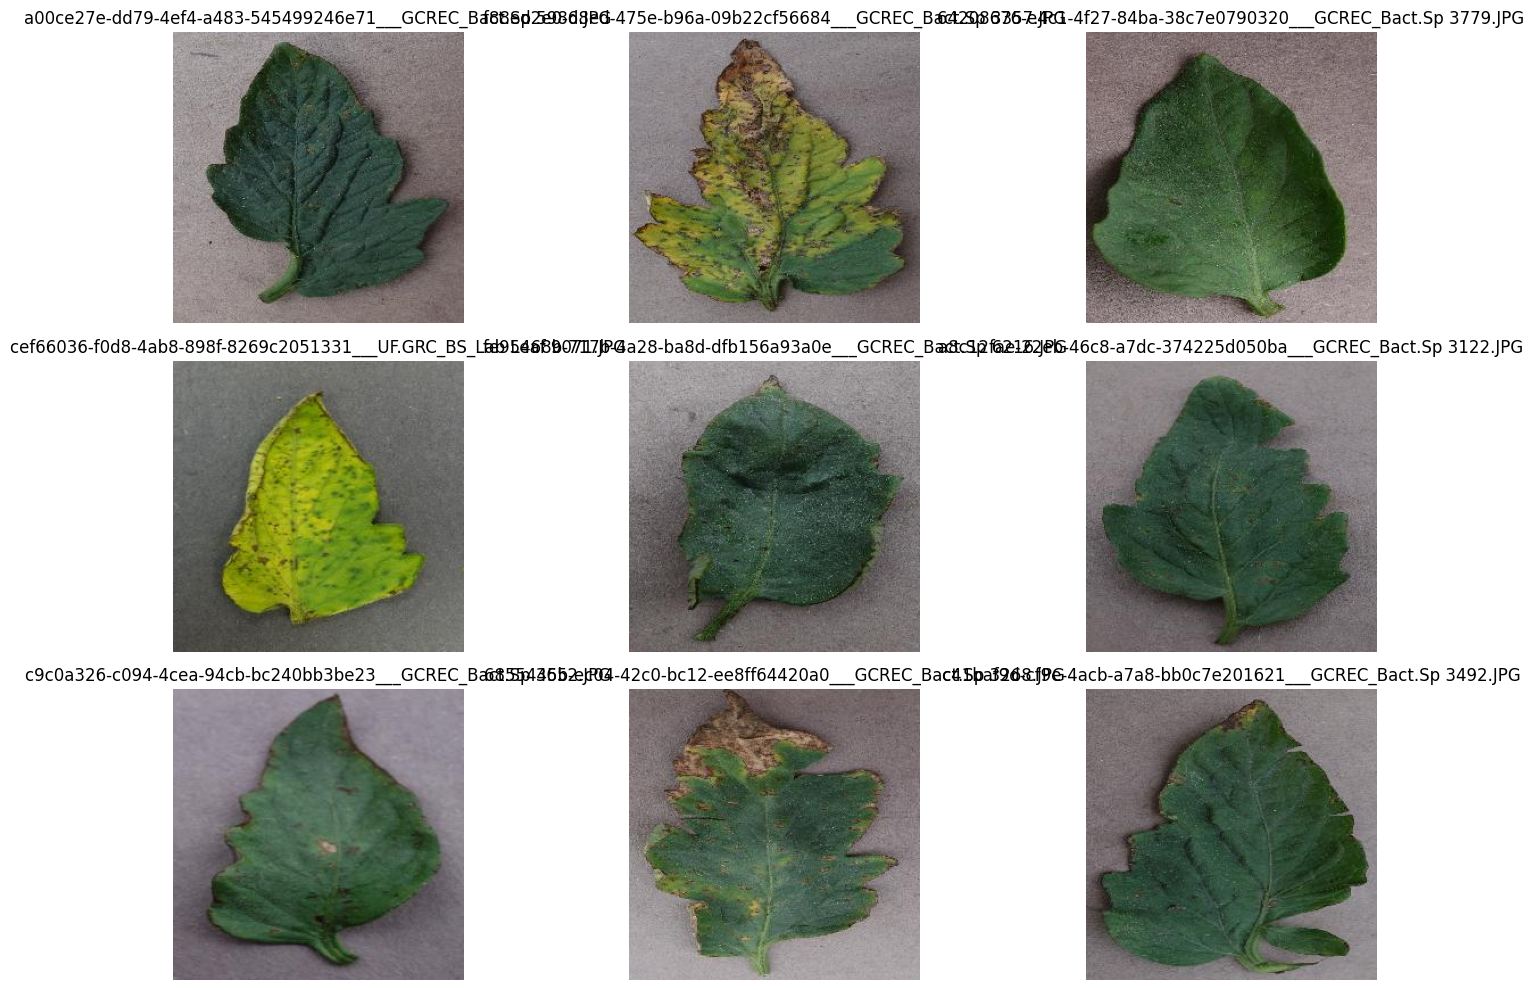

In [11]:
# Call the function with the desired directory and number of images
display_random_images(train_path, num_images=9, num_columns=3)


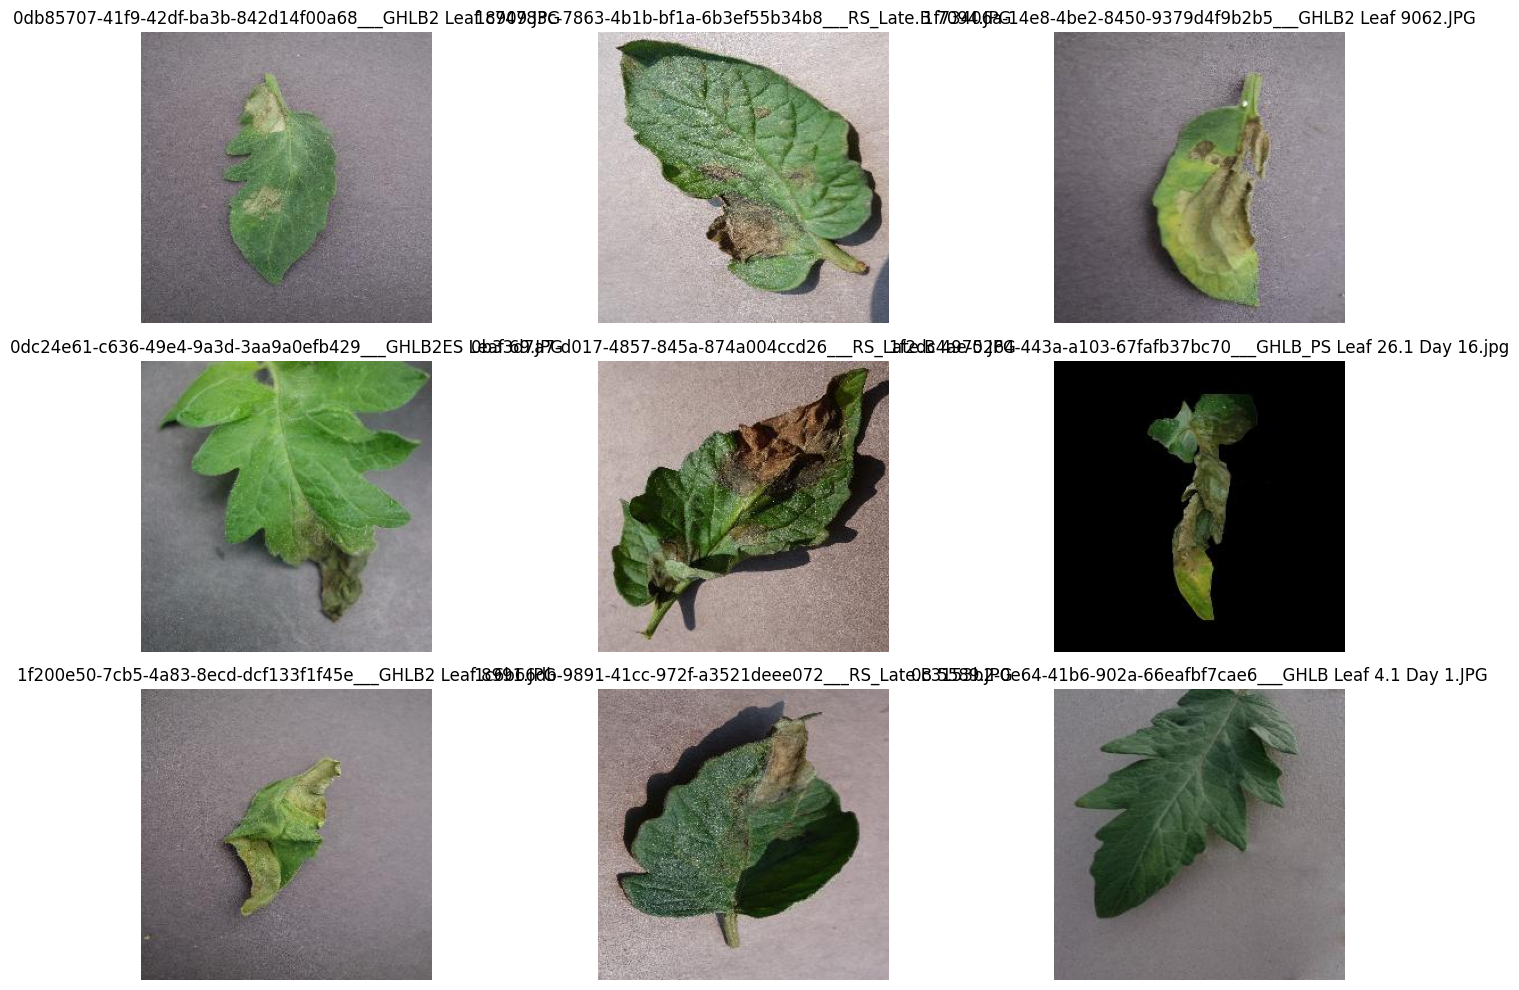

In [12]:
# Call the function with the desired directory and number of images
display_random_images(valid_path, num_images=9, num_columns=3)

# Creating a Convolutional Neural Network (CNN) Model

In the heart of our tomato disease detection project lies the neural network model responsible for classifying tomato leaf images. Convolutional Neural Networks (CNNs) are a powerful choice for image classification tasks, and here, we define our CNN model using the Keras library.

Here's a breakdown of the code:

- `num_classes`: We calculate the number of classes (disease categories) based on the number of classes defined in our training data using `train_generator.class_indices`. This value is essential for configuring the output layer of the model.

- `model = Sequential([...])`: We create a sequential model, a linear stack of layers, and define its architecture. Our model consists of the following layers:

    - `Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3))`: The first convolutional layer with 32 filters of size (3, 3), ReLU activation, and input shape (224, 224, 3). This layer extracts features from input images.
    
    - `MaxPooling2D(2, 2)`: Max-pooling layer with a 2x2 pooling window. It reduces spatial dimensions and retains important features.
    
    - `Conv2D(64, (3, 3), activation="relu")`: A second convolutional layer with 64 filters and ReLU activation.
    
    - `MaxPooling2D(2, 2)`: Another max-pooling layer to further reduce spatial dimensions.
    
    - `Flatten()`: This layer flattens the output from the previous layers into a one-dimensional vector.
    
    - `Dense(128, activation="relu")`: A fully connected (dense) layer with 128 neurons and ReLU activation.
    
    - `Dropout(0.5)`: Dropout layer with a dropout rate of 50%. Dropout helps prevent overfitting by randomly deactivating neurons during training.
    
    - `Dense(num_classes, activation="softmax")`: The final dense layer with `num_classes` neurons (equal to the number of disease categories) and softmax activation. This layer produces class probabilities for each category.

This architecture represents a common design for CNNs in image classification tasks. However, you can experiment with different architectures, hyperparameters, and regularization techniques to fine-tune the model's performance for your specific dataset.

With the CNN model defined, we're ready to compile it, train it on our dataset, and evaluate its performance in later sections of the notebook.


In [13]:
# Create a CNN model
num_classes = len(train_generator.class_indices)
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

# Compiling and Training the CNN Model

With our CNN model architecture defined, it's time to compile and train the model to learn from our tomato disease dataset. In this section, we'll cover the necessary steps for model compilation and training.

- `from tensorflow.keras.optimizers import Adam`: We import the Adam optimizer from the TensorFlow library. The optimizer is responsible for updating the model's weights during training to minimize the loss function.

- `model.compile(...)`: We compile the model by specifying its configuration. Here's what each argument does:
    - `optimizer=Adam(lr=0.0001)`: We choose the Adam optimizer as our optimizer with a learning rate of 0.0001. You can adjust the learning rate based on your experimentation and the specific dataset.
    - `loss="categorical_crossentropy"`: We use categorical cross-entropy as the loss function since this is a multi-class classification problem.
    - `metrics=["accuracy"]`: We specify that we want to track the accuracy metric during training.

- `from tensorflow.keras.callbacks import EarlyStopping`: We import the EarlyStopping callback from TensorFlow. This callback allows us to monitor the model's validation accuracy and stop training early if it stops improving.

- `early_stopping = EarlyStopping(...)`: We define the EarlyStopping callback with the following arguments:
    - `monitor='val_accuracy'`: We monitor the validation accuracy.
    - `patience=5`: Training will stop if there is no improvement in validation accuracy for 5 consecutive epochs.
    - `restore_best_weights=True`: After early stopping, the model's weights will be restored to the best weights obtained during training.

- `model.fit(...)`: We train the model using the `fit` method. The arguments are as follows:
    - `train_generator` and `valid_generator`: These are the data generators we created earlier for the training and validation datasets.
    - `steps_per_epoch` and `validation_steps`: These parameters are set to the number of batches in the training and validation generators, respectively.
    - `epochs=50`: We specify the maximum number of training epochs. The training may stop earlier if the EarlyStopping criteria are met.
    - `callbacks=[early_stopping]`: We include the EarlyStopping callback to monitor and control training.

With this setup, our CNN model will be trained on the tomato disease dataset, and the training will stop early if validation accuracy does not improve for a defined number of epochs. This helps prevent overfitting and ensures that we have the best-performing model.


In [14]:
# Define the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255, # Rescale pixel values (0-255 to 0-1)
    shear_range=0.2, # Apply random shear transformations
    zoom_range=0.2, # Apply random zoom
    horizontal_flip=True # Randomly flip images
)

valid_datagen = ImageDataGenerator(rescale=1./255) # Only rescaling for validation

# Create generators
train_generator = train_datagen.flow_from_directory(
    directory='/content/tomatoleaf/tomato/train', # Replace with the actual path to your training directory
    target_size=(150, 150), # Set the target size according to your model
    batch_size=32, # Set the batch size
    class_mode='categorical' # 'categorical' for multi-class classification
)

valid_generator = valid_datagen.flow_from_directory(
    directory='/content/tomatoleaf/tomato/val', # Replace with the actual path to your validation directory
    target_size=(150, 150), # Should match the target size of train_generator
    batch_size=32, # Set the batch size
    class_mode='categorical' # Same as in training
)

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [15]:
# Check the generators
print("Training generator:", train_generator)
print("Validation generator:", valid_generator)

# Check number of classes
print("Number of classes:", num_classes)

# Run a single batch through the generator to see if it works
x_batch, y_batch = next(train_generator)
print("Batch shape:", x_batch.shape)
print("Labels shape:", y_batch.shape)


Training generator: <keras.src.preprocessing.image.DirectoryIterator object at 0x7d69a053a830>
Validation generator: <keras.src.preprocessing.image.DirectoryIterator object at 0x7d69a0539b40>
Number of classes: 10
Batch shape: (32, 150, 150, 3)
Labels shape: (32, 10)


In [16]:
num_classes = len(train_generator.class_indices)  # Assuming your train_generator is set up correctly
x_batch, y_batch = next(train_generator)
print(f"Batch shapes: {x_batch.shape}, {y_batch.shape}")


Batch shapes: (32, 150, 150, 3), (32, 10)


In [17]:
# Import the necessary module
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input

inputs = Input(shape=(150, 150, 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')




# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20, #50 for more accurate model fitting
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    callbacks=[early_stopping, model_checkpoint]  # Add ModelCheckpoint if needed
)

# Check the number of samples in the validation generator
print("Number of samples in validation generator:", len(valid_generator.filepaths))

# Evaluate the model on the validation data
loss, accuracy = model.evaluate(valid_generator, steps=len(valid_generator))
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

Epoch 1/20
313/313 [==============================] - 71s 224ms/step - loss: 1.2063 - accuracy: 0.5964 - val_loss: 0.9704 - val_accuracy: 0.6880
Epoch 2/20
313/313 [==============================] - 70s 223ms/step - loss: 0.5770 - accuracy: 0.8013 - val_loss: 0.9208 - val_accuracy: 0.7030
Epoch 3/20
313/313 [==============================] - 69s 220ms/step - loss: 0.4322 - accuracy: 0.8506 - val_loss: 0.6824 - val_accuracy: 0.7830
Epoch 4/20
313/313 [==============================] - 69s 219ms/step - loss: 0.3472 - accuracy: 0.8792 - val_loss: 0.5056 - val_accuracy: 0.8250
Epoch 5/20
313/313 [==============================] - 68s 217ms/step - loss: 0.2846 - accuracy: 0.9014 - val_loss: 0.5147 - val_accuracy: 0.8270
Epoch 6/20
313/313 [==============================] - 68s 218ms/step - loss: 0.2510 - accuracy: 0.9144 - val_loss: 0.8536 - val_accuracy: 0.7480
Epoch 7/20
313/313 [==============================] - 68s 217ms/step - loss: 0.2117 - accuracy: 0.9242 - val_loss: 0.9337 - val_ac

# Visualizing Training Progress

Monitoring the training progress of our machine learning model is crucial for assessing its performance and identifying potential issues like overfitting. In this section, we'll visualize the training and validation accuracy and loss using Matplotlib.

## Training and Validation Accuracy Plot

The following code plots the training and validation accuracy over epochs:


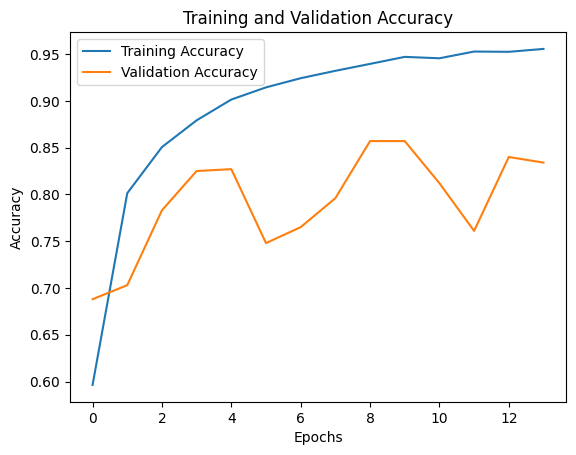

In [18]:
# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

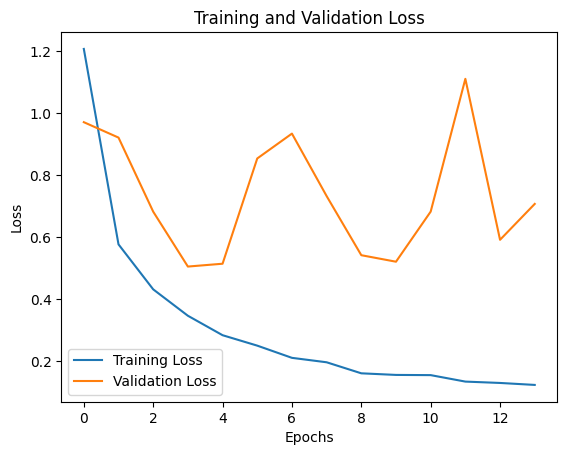

In [19]:
# Plot training and validation loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Evaluating the Model on Test Data and Saving

After training our tomato disease detection model, it's essential to assess its performance on unseen data to ensure its real-world utility. Additionally, saving the trained model allows us to deploy it for making predictions on new tomato leaf images.

## Evaluating the Model on Test Data

The following code evaluates the trained model on the test data:



In [20]:
# Make predictions on test data
test_loss, test_accuracy = model.evaluate(valid_generator, steps=len(valid_generator))
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Save the trained model
model.save("trained_model.h5")
print("Trained model saved as 'trained_model.h5'")

32/32 [==============================] - 2s 46ms/step - loss: 0.5421 - accuracy: 0.8570
Test Loss: 0.5421
Test Accuracy: 0.8570
Trained model saved as 'trained_model.h5'


# Generating and Visualizing the Confusion Matrix

The confusion matrix is a valuable tool for assessing the performance of a classification model, especially in multi-class classification scenarios like our tomato disease detection project. In this section, we'll use the saved model to generate predictions and create a confusion matrix.


1/1 [==============================] - 0s 76ms/step


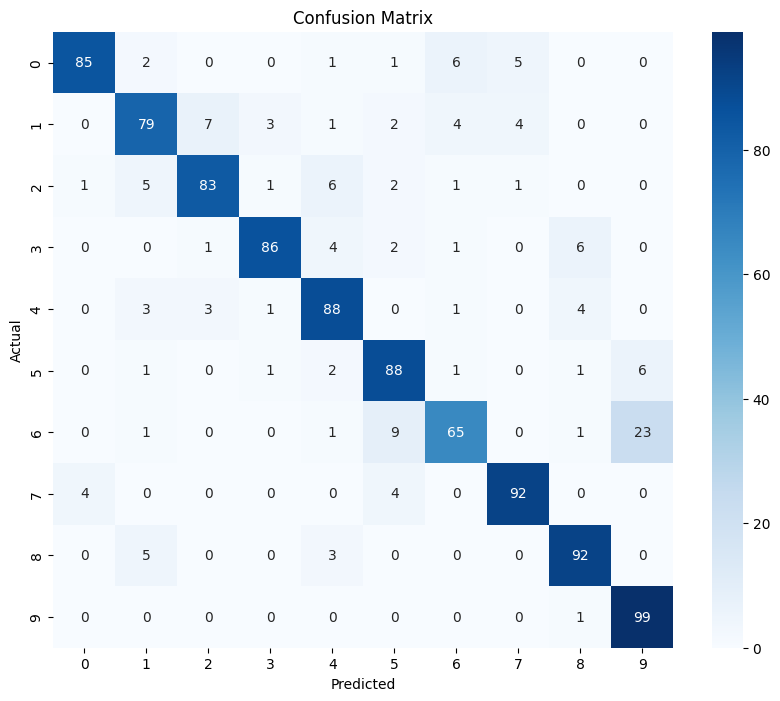

In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
# Load the saved model
loaded_model = tf.keras.models.load_model("trained_model.h5")

# Initialize variables
num_samples = len(valid_generator.filenames)
batch_size = 32
num_batches = int(np.ceil(num_samples / batch_size))
all_test_labels = []
all_predicted_labels = []

# Generate predictions in batches
for _ in range(num_batches):
    batch_images, batch_labels = next(valid_generator)
    batch_predictions = loaded_model.predict(batch_images)
    batch_predicted_labels = np.argmax(batch_predictions, axis=1)

    all_test_labels.extend(np.argmax(batch_labels, axis=1))
    all_predicted_labels.extend(batch_predicted_labels)

# Generate confusion matrix
cm = confusion_matrix(all_test_labels, all_predicted_labels)

# Plot the confusion matrix
class_names = [str(i) for i in range(num_classes)]  # Replace with actual class names if available
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()